In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' #矢量图比较高清

In [2]:
data_directory = "F:/PycharmProjects/pet-ct/3dpet/"

In [3]:
series_IDs = sitk.ImageSeriesReader.GetGDCMSeriesIDs(data_directory)
series_IDs 

('1.2.840.113704.7.32.0.184.21753.19510010158.1401390703.387643700',)

In [5]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(data_directory, series_IDs[0])
series_file_names

('F:/PycharmProjects/pet-ct/3dpet/I2870000',
 'F:/PycharmProjects/pet-ct/3dpet/I2860000',
 'F:/PycharmProjects/pet-ct/3dpet/I2850000',
 'F:/PycharmProjects/pet-ct/3dpet/I2840000',
 'F:/PycharmProjects/pet-ct/3dpet/I2830000',
 'F:/PycharmProjects/pet-ct/3dpet/I2820000',
 'F:/PycharmProjects/pet-ct/3dpet/I2810000',
 'F:/PycharmProjects/pet-ct/3dpet/I2800001',
 'F:/PycharmProjects/pet-ct/3dpet/I2790000',
 'F:/PycharmProjects/pet-ct/3dpet/I2780000',
 'F:/PycharmProjects/pet-ct/3dpet/I2770000',
 'F:/PycharmProjects/pet-ct/3dpet/I2760000',
 'F:/PycharmProjects/pet-ct/3dpet/I2750000',
 'F:/PycharmProjects/pet-ct/3dpet/I2740000',
 'F:/PycharmProjects/pet-ct/3dpet/I2730000',
 'F:/PycharmProjects/pet-ct/3dpet/I2720000',
 'F:/PycharmProjects/pet-ct/3dpet/I2710000',
 'F:/PycharmProjects/pet-ct/3dpet/I2700001',
 'F:/PycharmProjects/pet-ct/3dpet/I2690000',
 'F:/PycharmProjects/pet-ct/3dpet/I2680000',
 'F:/PycharmProjects/pet-ct/3dpet/I2670000',
 'F:/PycharmProjects/pet-ct/3dpet/I2660000',
 'F:/Pycha

In [6]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [7]:
series_reader.MetaDataDictionaryArrayUpdateOn()
series_reader.LoadPrivateTagsOn()
image3D = series_reader.Execute()

In [8]:
image3D

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000001EED2A6E120> >

In [11]:
print(image3D.GetSize())
print(image3D.GetSpacing())
print(image3D.GetOrigin())
print(image3D.GetDirection())
print(image3D.GetPixelID())

(128, 128, 287)
(5.46875, 5.46875, 3.27001953125)
(-347.265625, -347.265625, -1037.6990966796875)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
9


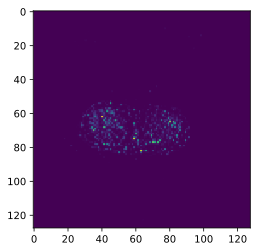

In [12]:
src_show = sitk.GetArrayViewFromImage(image3D)
plt.imshow(src_show[0,:,:])
plt.show()

In [15]:
input_size=image3D.GetSize()
input_spacing=image3D.GetSpacing()
input_origin=image3D.GetOrigin()
input_direction=image3D.GetDirection()
input_pixelid=image3D.GetPixelID()

# resample图要素
newWidth = 512
newHeight = 512
# 通过size计算间距
x_out_spacing = input_spacing[0]*input_size[0] / newWidth
y_out_spacing = input_spacing[1]*input_size[1] / newHeight

print(x_out_spacing)
print(y_out_spacing)

1.3671875
1.3671875


In [16]:
output_size =(newWidth,newHeight,287)
output_spacing = (x_out_spacing,y_out_spacing,3.27001953125)
output_origin = input_origin
output_direction = input_direction
output_pixelid = input_pixelid

In [78]:
transform = sitk.Transform()
interpolator = sitk.sitkBSpline

In [79]:
resampled_img3D = sitk.Resample(image3D,output_size,transform,interpolator,output_origin,output_spacing,output_direction,0.0,output_pixelid)

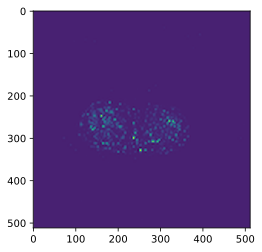

In [80]:
resampled_show = sitk.GetArrayViewFromImage(resampled_img3D)
plt.imshow(resampled_show[0,:,:])
plt.show()

In [81]:
writer = sitk.ImageFileWriter()
writer.KeepOriginalImageUIDOn()


In [82]:
print(image3D.GetDepth())
output_dir = "F:\\PycharmProjects\\pet-ct\\Resample_3dpet\\"
print(output_dir)

287
F:\PycharmProjects\pet-ct\Resample_3dpet\


In [83]:
for i in range(image3D.GetDepth()):
    image = sitk.ReadImage(series_file_names[i])
    all_keys = image.GetMetaDataKeys()
    image3D_slice = resampled_img3D[:,:,i]
    for key in all_keys:
        image3D_slice.SetMetaData(key, image.GetMetaData(key))
        
    image3D_slice.SetMetaData("0028|0010",str(output_size[0]))
    image3D_slice.SetMetaData("0028|0011",str(output_size[1]))
    image3D_slice.SetMetaData("0028|0030",str(output_spacing[0])+"\\"+str(output_spacing[1]) )
    
    writer.SetFileName(os.path.join(output_dir,series_file_names[i]+'.dcm'))
    writer.Execute(image3D_slice)

In [47]:
image1 = sitk.ReadImage(series_file_names[0])
spacing = image1.GetMetaData("0028|0030")
width = image1.GetMetaData("0028|0010")
print(type(width))
print(type(spacing))
print(spacing)
print(width)

<class 'str'>
<class 'str'>
5.46875\5.46875 
128


In [62]:
s =str(output_spacing[0])+'\\'+str(output_spacing[1])
print(type(s))
print(s)

<class 'str'>
1.3671875\1.3671875
